In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [9]:
def ff(x,omega):
    return omega 
    #If you just return ff=omega, this gives the usual Classifier free guidance, the same as the one 
    #called 'linear' in the calc_score function
    #return omega/(x**.75+1.e-6)
def calc_score(itau, dt,itfms,omega,q,sigma2):
    expt=np.exp(-dt*(itfms-itau))
    exp2t=expt**2
    gammat=(sigma2*exp2t+1-exp2t)
    linear=(expt/gammat)*(1+omega-omega*np.tanh(q*expt/gammat)) 
    nonlinear=(expt/gammat)*(1+(1- np.tanh(q*expt/gammat))*ff((expt/gammat)*(1-np.tanh(q*expt)),omega))
    normdiff=(expt/gammat)*(1-np.tanh(q*expt/gammat))#Norm of S_full-S_class
    return nonlinear,normdiff

def init_backward():
    return np.random.normal(0,1)
    
def calc_traj_back_exact(qinit,nt,dt,itfms,omega,sigma2):
    # qinit: num, random initial value for q, 1D
    # nt: 800, num_steps?
    # dt: 0.01, time change
    # itfms: tau, final time - spec time 800-200=600
    # omega: CFG strength
    # sigma2: noise value
    
    qback=np.zeros(nt)
    time=np.zeros(nt)
    normd=np.zeros(nt)
    qback[0]=qinit # one dimensional initial value for q
    q=qback[0] # same as qinit
    time[0]=0
    for it in np.arange(nt-1):
        expt=np.exp(-dt*(itfms-it))
        exp2t=expt**2
        gammat=(sigma2*exp2t+1-exp2t)
        eta=np.random.normal(0,np.sqrt(2*dt))
        #rx=xback[it,:]
        sc,normdiff=calc_score(it, dt,itfms,omega,q,sigma2)
        q=q-dt*q*(2/gammat-1)+2*dt*sc+eta
        qback[it+1]=q
        time[it+1]=it*dt
        normd[it]=normdiff
    return time,qback,normd

In [10]:
#Here we run three single trajectories just to have a look
qinit=init_backward()
dt=.01
nt=800 #final time is nt*dt
dim=4
sigma2=1
tspec=(1/2)*np.log(dim)
ns=int(tspec/dt)
#ns=200 #speciation time is t_s=ns*dt=(1/2) log (d)
itfms=nt-ns
print('dim D=',dim,'iterations nt=',nt,'time step dt=',dt,'speciation ns=',ns)
omega=0
time,qtraj0,normdiff0=calc_traj_back_exact(qinit,nt,dt,itfms,omega,sigma2)
omega=0
time,qtraj1,normdiff1=calc_traj_back_exact(qinit,nt,dt,itfms,omega,sigma2)
omega=0
time,qtraj2,normdiff2=calc_traj_back_exact(qinit,nt,dt,itfms,omega,sigma2)

dim D= 4 iterations nt= 800 time step dt= 0.01 speciation ns= 69
731
730
729
728
727
726
725
724
723
722
721
720
719
718
717
716
715
714
713
712
711
710
709
708
707
706
705
704
703
702
701
700
699
698
697
696
695
694
693
692
691
690
689
688
687
686
685
684
683
682
681
680
679
678
677
676
675
674
673
672
671
670
669
668
667
666
665
664
663
662
661
660
659
658
657
656
655
654
653
652
651
650
649
648
647
646
645
644
643
642
641
640
639
638
637
636
635
634
633
632
631
630
629
628
627
626
625
624
623
622
621
620
619
618
617
616
615
614
613
612
611
610
609
608
607
606
605
604
603
602
601
600
599
598
597
596
595
594
593
592
591
590
589
588
587
586
585
584
583
582
581
580
579
578
577
576
575
574
573
572
571
570
569
568
567
566
565
564
563
562
561
560
559
558
557
556
555
554
553
552
551
550
549
548
547
546
545
544
543
542
541
540
539
538
537
536
535
534
533
532
531
530
529
528
527
526
525
524
523
522
521
520
519
518
517
516
515
514
513
512
511
510
509
508
507
506
505
504
503
502
501
500
499
498

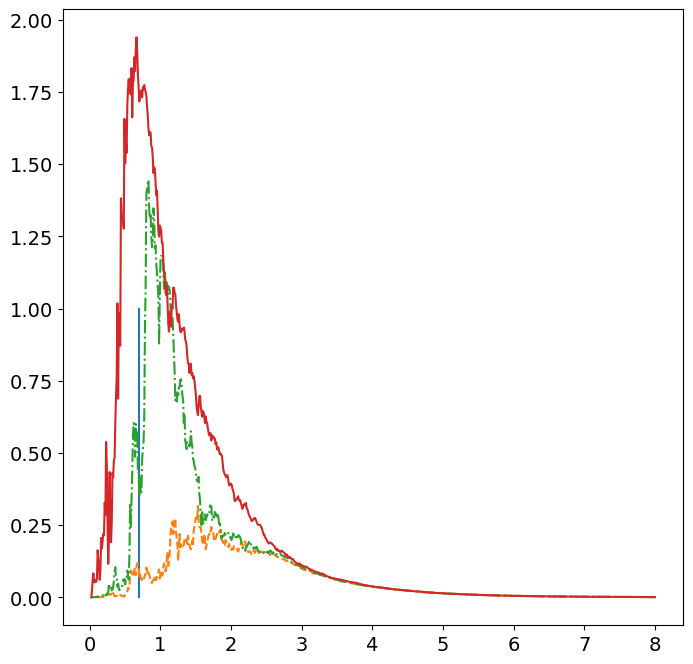

In [41]:
#plt.plot(nt*dt-time,qtraj0)
#plt.plot(nt*dt-time,qtraj1)
#plt.plot(nt*dt-time,qtraj4)
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,1])
plt.plot(nt*dt-time,normdiff0,'--')
plt.plot(nt*dt-time,normdiff1,'-.')
plt.plot(nt*dt-time,normdiff2)
#plt.axis([0,6,0,.5])

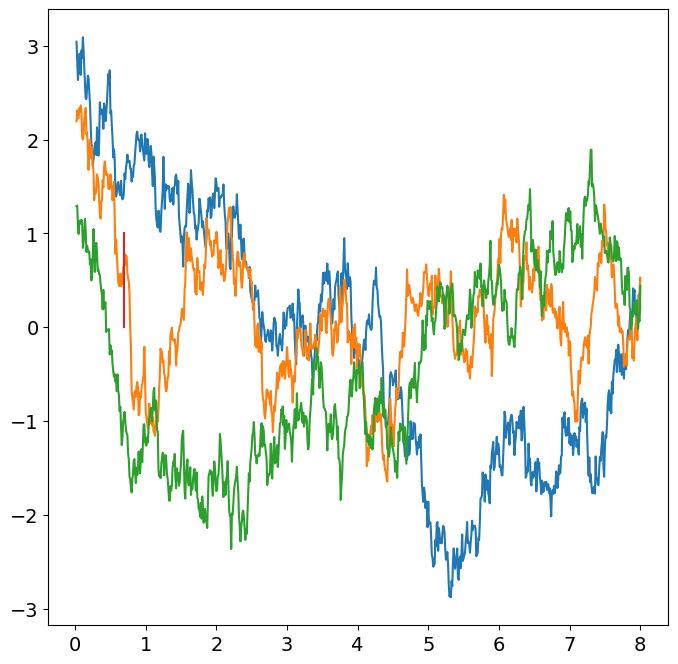

In [42]:
plt.plot(nt*dt-time,qtraj0)
plt.plot(nt*dt-time,qtraj1)
plt.plot(nt*dt-time,qtraj2)
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,1])

#plt.axis([0,6,0,.5])

In [34]:
#Run nsample trajectories 
nsample=1000
dt=.01
nt=800 #final time is nt*dt
dim=3
sigma2=1
tspec=(1/2)*np.log(dim)
ns=int(tspec/dt)
#ns=200 #speciation time is t_s=ns*dt=(1/2) log (d)
itfms=nt-ns
nomega=5
omegag=np.zeros(nomega)
qtraj=np.zeros((nomega,nsample,nt))
normstat=np.zeros((nomega,nsample,nt))
for ijk in np.arange(nsample):
    qinit=init_backward()
    for iomega in np.arange(nomega):
        omega=4*iomega
        omegag[iomega]=omega
        time,qtraj[iomega,ijk,:],normstat[iomega,ijk,:]=calc_traj_back_exact(qinit,nt,dt,itfms,omega,sigma2)

omega= 0.0
omega= 4.0
omega= 8.0
omega= 12.0
omega= 16.0


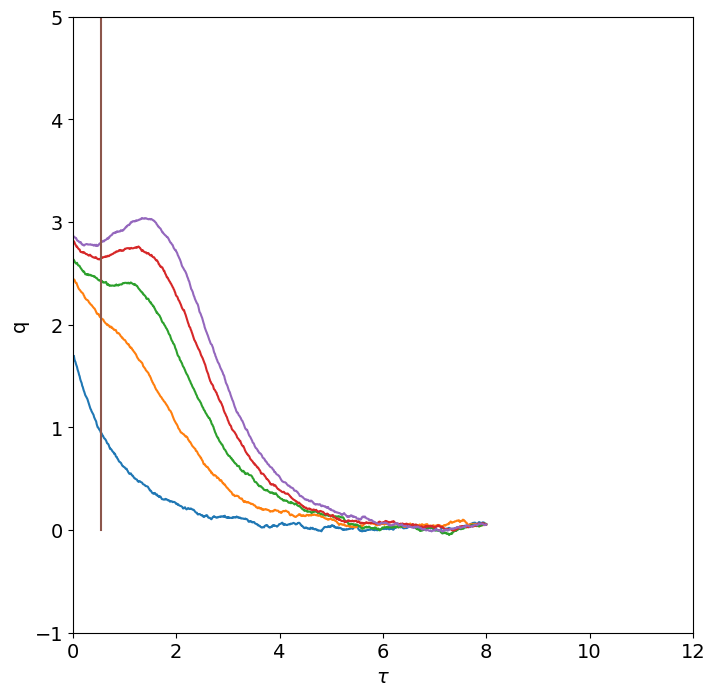

In [36]:
for iomega in np.arange(nomega):
    print('omega=',omegag[iomega])
    qav=np.mean(qtraj,axis=1)
    plt.plot(nt*dt-time,qav[iomega,:])
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,5])
plt.xlabel(r'$\tau$')
plt.ylabel('q')
#plt.text(7,8,'$\omega=0$ to $16$')
plt.axis([0,12,-1,5])
#plt.savefig('free-guidance-gaussian-mixture-q-backward_v3.pdf')
plt.show()

omega= 0.0
omega= 16.0


(array([  0.,   0.,   0.,   1.,   6.,  11.,  29.,  26.,  53.,  60.,  86.,
        102.,  95., 104.,  84.,  77.,  64.,  70.,  41.]),
 array([0.        , 0.21052632, 0.42105263, 0.63157895, 0.84210526,
        1.05263158, 1.26315789, 1.47368421, 1.68421053, 1.89473684,
        2.10526316, 2.31578947, 2.52631579, 2.73684211, 2.94736842,
        3.15789474, 3.36842105, 3.57894737, 3.78947368, 4.        ]),
 <BarContainer object of 19 artists>)

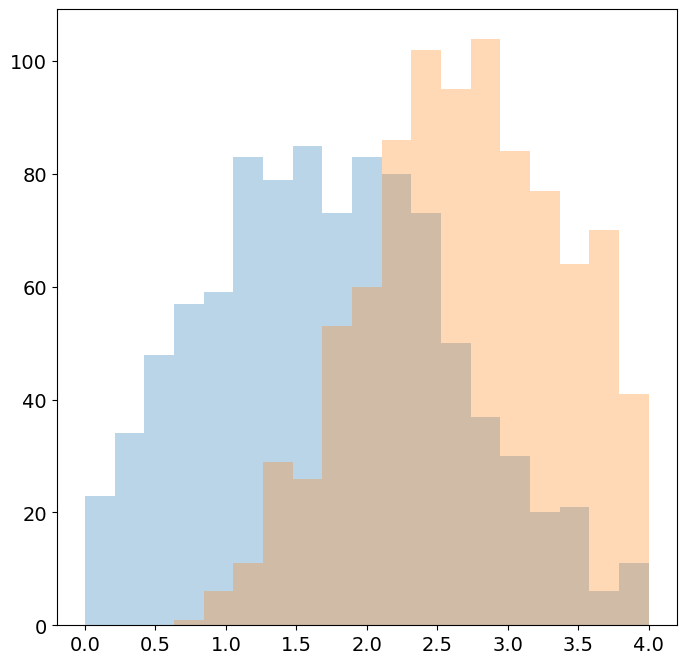

In [53]:
qav0=qtraj[:,:,nt-1]
binh=np.linspace(0,4,20)
iomega=0
print('omega=',omegag[iomega])
finalq=qav0[iomega,:]
plt.hist(finalq,binh,alpha=.3)
iomega=nomega-1
print('omega=',omegag[iomega])
finalq=qav0[iomega,:]
plt.hist(finalq,binh,alpha=.3)
#for iomega in np.arange(nomega):
#    print('omega=',omegag[iomega])
#    finalq=qav0[iomega,:]
#    plt.hist(finalq,binh)

omega= 0.0
omega= 4.0
omega= 8.0
omega= 12.0
omega= 16.0


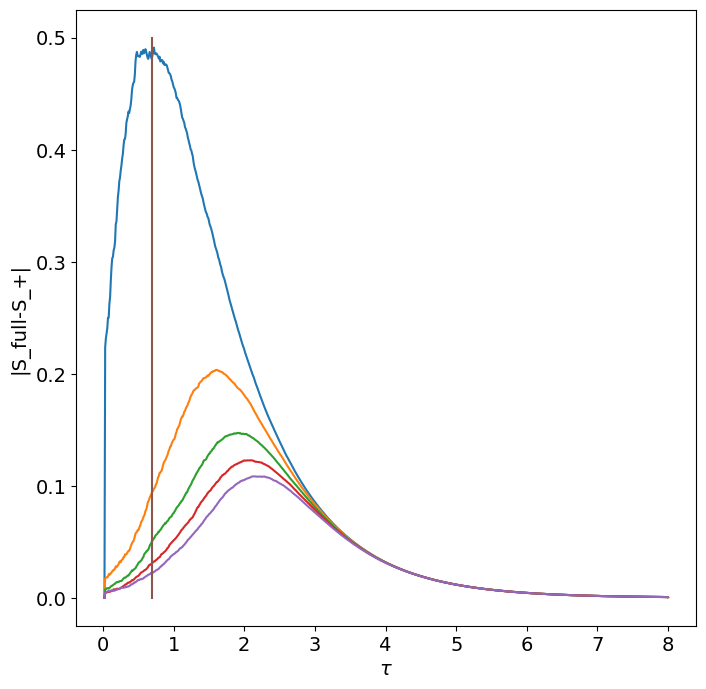

In [54]:
for iomega in np.arange(nomega):
    print('omega=',omegag[iomega])
    normav=np.mean(normstat,axis=1)
    plt.plot(nt*dt-time,normav[iomega,:])
plt.plot([nt*dt-dt*itfms,nt*dt-dt*itfms],[0,.5])
plt.xlabel(r'$\tau$')
plt.ylabel('|S_full-S_+|')
#plt.text(7,8,'$\omega=0$ to $16$')
#plt.axis([0,12,-1,10])
#plt.savefig('free-guidance-gaussian-mixture-q-backward_v3.pdf')
plt.show()